# Interpolação polinomial

## $ \S 1 $ Introdução

É freqüente a situação em que temos uma tabela com alguns valores de uma função desconhecida $ f $ e precisamos "ler entre as linhas" da tabela para encontrar valores de $ f $ que não foram dados.

**Exemplo 1:** Considere a tarefa de se encontrar a posição futura de um cometa que foi avistado e teve sua velocidade medida em apenas três instantes $ t_0 $, $ t_1 $ e $ t_2 $. A princípio este problema não pode ser resolvido com as técnicas do curso de Cálculo, pois não dispomos de uma *fórmula* para a função $ v(t) $ que descreve a velocidade do cometa. Como alternativa, podemos substituir $ v $ pelo único polinômio $ p $ de  grau $ 2 $ satisfazendo $ p(t_i) = v(t_i) $, e então integrar $ p $ para obter uma aproximação para a função posição do cometa.

**Definição (interpolação):** **Interpolar** uma função significa estimar valores desconhecidos ou difíceis de serem determinados exatamente a partir de valores conhecidos.

📝 Uma minoria de autores prefere distingüir entre *interpolação* ou *extrapolação* conforme pretenda-se encontrar um valor desconhecido dentro ou fora do intervalo/domínio coberto pelos dados originais, respectivamente.

A **interpolação polinomial** consiste do uso de um polinômio que satisfaça os dados iniciais para obter novos dados. Para construir este polinômio as escolhas mais comuns são:
* Amostragem de valores em vários pontos (*polinômio de Lagrange*);
* Amostragem dos valores das sucessivas derivadas de uma função num ponto (*polinômio de Taylor*);
* Alguma combinação dos anteriores.

## $ \S 2 $ Interpolação polinomial usando valores da função

**Teorema:** Dados $ N + 1 $ pontos
$$
(x_1, y_1)\,,\ (x_2, y_2)\,,\ \dots\,,\ (x_{N + 1}, y_{N + 1})\,,
$$
existe um *único* polinômio de grau $ \le N $ passando por eles.

**Demonstração:** Seja
$$
p(x) = a_0 + a_1 x + a_2x^2 + \cdots + a_nx^N = \sum_{k=1}^N a_kx^k.
$$
Temos:
* $ N + 1 $ coeficientes indeterminados;
* $ N + 1 $ condições a serem satisfeitas, a saber, $ p(x_i) = y_i $ para $ i=1, \dots, N $.

Isto dá origem ao sistema linear

$$\begin{cases}
a_0 + a_1x_1 + a_2x_1^2 + \dots + a_{N-1}x_1^{N-1} + a_Nx_1^N \\
a_0 + a_1x_2 + a_2x_2^2 + \dots + a_{N-1}x_2^{N-1} + a_Nx_2^N \\
\phantom{a_0 + a_1x_2 + a_2x_2^2+ \ } \vdots  \\
a_0 + a_1x_{N+1} + a_2x_{N+1}^2 + \dots + a_{N-1}x_{N+1}^{N-1} + a_Nx_{N+1}^N
\end{cases}
$$
ou, em forma matricial,
$$
\left(\begin{array}{ccccc}
1 & x_1 & x_1^2 & \cdots & x_1^N \\
1 & x_2 & x_2^2 & \cdots & x_2^N \\
\vdots & \vdots & \vdots & \cdots & \vdots \\
1 & x_{N+1} & x_{N+1}^2 & \cdots & x_{N+1}^N 
\end{array}\right)\ 
\left(\begin{array}{c}
a_0 \\
a_1 \\
\vdots \\
a_N
\end{array}\right)
=
\left(\begin{array}{c}
y_0 \\
y_1 \\
\vdots \\
y_N
\end{array}\right)
$$
Observe que aqui as variáveis do sistema são os $ a_k $, que ainda não foram determinados, e não as potências dos $ x_k $, que são conhecidas ou podem ser calcudas.

O determinante da matriz à esquerda é chamado de **determinante de Vandermonde**:
$$
V = 
\left|\begin{array}{ccccc}
1 & x_1 & x_1^2 & \cdots & x_1^N \\
1 & x_2 & x_2^2 & \cdots & x_2^N \\
\vdots & \vdots & \vdots & \cdots & \vdots \\
1 & x_{N+1} & x_{N+1}^2 & \cdots & x_{N+1}^N 
\end{array}\right| = \lvert x_i^j \rvert \qquad (i=1,\dots,N+1,\ j = 0,\dots,N).
$$
É possível mostrar que este determinante é não-nulo desde que $ x_i \ne x_{i'} $ para quaisquer $ i \ne i' $. Portanto o sistema linear tem uma *única* solução $ (a_0,a_1,\dots,a_N) $. Estes são os coeficientes do polinômio $ p $ procurado. $  \blacksquare $

**Problema 1:**

(a) Sem usar o computador, encontre um polinômio que interpole os dados:

| x | y |
|---|---|
| 0 | 2 |
| 1 | 2 |
| 2 | 0 |
| 3 | 0 |

(b) Este polinômio é único?

(c) Esboce o gráfico deste polinômio usando Python.

(d) Encontre $ p(4) $.

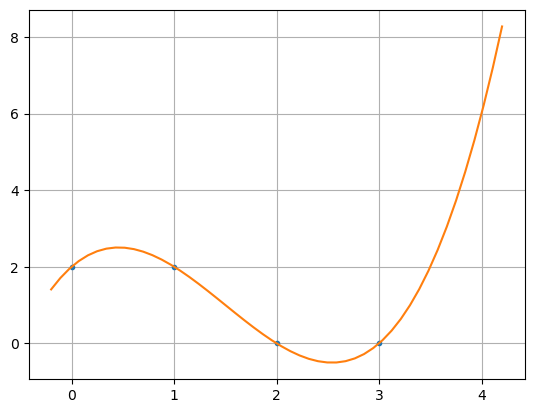

O valor de p em x = 4 é: 6.0


In [15]:
import matplotlib.pyplot as plt
import numpy as np


def p(x):
    return 2 + (7 / 3) * x - 3 * x**2 + (2 / 3) * x**3

xs = [0, 1, 2, 3]
ys = [2, 2, 0, 0]

x_grid = np.linspace(-0.2, 4.2, num=50)
plt.plot(xs, ys, '.', x_grid, p(x_grid),'-')
plt.grid()
plt.show()

print("O valor de p em x = 4 é:", p(4))